In [6]:
# Imports
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, BatchNormalization, Flatten, MaxPooling2D

from tensorflow.keras import utils
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from time import gmtime, strftime
%matplotlib inline

In [2]:
# Optimization of data
# plt.imshow(Image.fromarray(x_train[1]))

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
# magic
model = Sequential()
model.add(
    Conv2D(8, (4, 4), input_shape = (28, 28, 1), activation = 'relu')
)

model.add(
    Conv2D(8, (4, 4), activation = 'relu')
)
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(400, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
log = model.fit(x_train, y_train, validation_split = 0.2, batch_size=512, epochs=15, verbose=1)
model.save_weights('Number_resolver.h5')

Epoch 1/15
94/94 [==============================] - 1s 9ms/step - loss: 1.0374 - accuracy: 0.7138 - val_loss: 0.1356 - val_accuracy: 0.9615
Epoch 2/15
94/94 [==============================] - 1s 7ms/step - loss: 0.1377 - accuracy: 0.9597 - val_loss: 0.0819 - val_accuracy: 0.9763
Epoch 3/15
94/94 [==============================] - 1s 7ms/step - loss: 0.0822 - accuracy: 0.9755 - val_loss: 0.0672 - val_accuracy: 0.9797
Epoch 4/15
94/94 [==============================] - 1s 7ms/step - loss: 0.0669 - accuracy: 0.9795 - val_loss: 0.0556 - val_accuracy: 0.9835
Epoch 5/15
94/94 [==============================] - 1s 7ms/step - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.0502 - val_accuracy: 0.9859
Epoch 6/15
94/94 [==============================] - 1s 7ms/step - loss: 0.0415 - accuracy: 0.9877 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 7/15
94/94 [==============================] - 1s 7ms/step - loss: 0.0366 - accuracy: 0.9890 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 8/15
94/94 [==

Final accuracy on test batch is 98.9%
Enter description: 


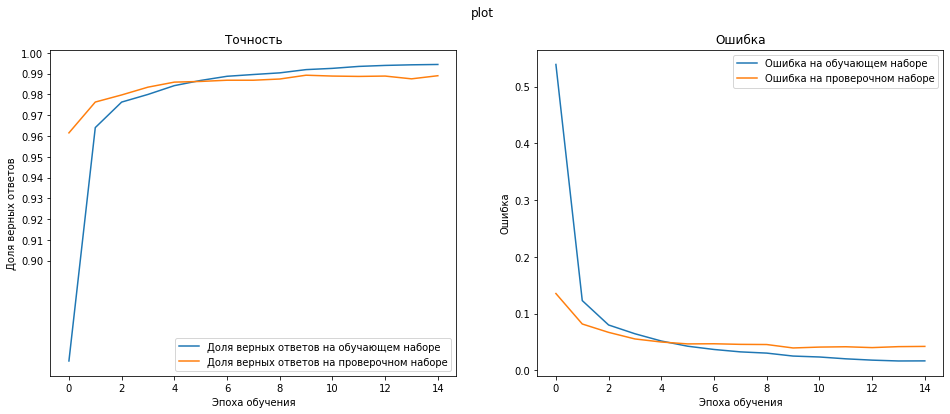

In [13]:
# Analyzing logs
def model_analyze(log):
  # model = keras.model.load_model(path)

  print('Final accuracy on test batch is ', round(log.history['val_accuracy'][-1]*100, 2), '%', sep = '')
  descr = input('Enter description: ')
  if (descr == ''): descr = 'plot'
  


  fig, axis = plt.subplots(1, 2, figsize = (16, 6))

  axis[0].plot(log.history['accuracy'], 
          label='Доля верных ответов на обучающем наборе')
  # Выводим график точности на проверочной выборке
  axis[0].plot(log.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  

  # Выводим подписи осей
  axis[0].set_title('Точность')
  axis[0].set_xlabel('Эпоха обучения')
  axis[0].set_ylabel('Доля верных ответов')

  axis[0].set_yticks([i/100 for i in range(90, 101, 1)])
  axis[0].legend()

  axis[1].plot(log.history['loss'], label='Ошибка на обучающем наборе')
  axis[1].plot(log.history['val_loss'], label='Ошибка на проверочном наборе')
  axis[1].set_title("Ошибка")
  axis[1].set_xlabel('Эпоха обучения')
  axis[1].set_ylabel('Ошибка')
  axis[1].legend()

  fig.suptitle(descr)
  plt.savefig(strftime("%Y-%m-%d %H:%M:%S", gmtime()) + '__' + descr + '.png')
  plt.show()


model_analyze(log)

In [5]:
# Testing

# t = 1234
# plt.imshow(Image.fromarray(x_test[t].reshape(28, 28) * 256))
# print('We expect ', np.argmax(y_test[t]))
# x = np.expand_dims(x_test[t], axis = 0)
# print('We get ', np.argmax(model.predict(x)))

# from tensorflow.keras.preprocessing import image
# pic = image.load_img('two.png', color_mode = 'grayscale')
# pic = image.img_to_array(pic)
# pic = (255 - pic)/255
# pic = pic.reshape(1, 784)

# print('We get ', np.argmax(model.predict(pic)))



800-400-relu-relu: 0.98<br>
800-400-relu-relu-NoBias: 0.9803<br>
800-400-none-none: 0.9259 - Дерганые графики проверочного набора, переобучения не наблюдается<br>
800-400-none-none-NoBias: 0.9179 - см. с bias<br>
Batch_Norm vs /255 - простое деление незначительно лучше<br>
